# Clase 8 Supuestos MCO

# Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos

In [2]:
df = pd.read_csv('datasets/clase8.csv')

In [3]:
df

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81
...,...,...,...,...
59,115,62,1470,3.89
60,186,45,300,6.90
61,47,85,3630,4.10
62,178,45,220,6.09


## Supuesto de numero de observaciones sea mayor al número de parametros.

Basta con examinar las dimensions del DataFrame para determinar la cantidad máxima de parametros que podrían estimarse.

In [4]:
df.shape

(64, 4)

Para este caso el número maximo de parametros a estimar es 63.

 ¿Qué sucede si el número de observaciones es inferior al número de parámetros a estimar? “Si hay menos
 de k observaciones entonces X no puede ser de rango completo” 
 Cuando ocurre esto la varianza es infinita y el método MCO no puede emplearse.

## Supuesto de variación en los valores de las variables explicativas 

 Este supuesto nos dice que las variables explicativas deben ser "variables", 
 es decir los valores de estas deben cambiar y no pueden corresponder a una misma constante.

In [5]:
pd.DataFrame(df.apply(np.std, axis = 0),
columns = ["Desviación estándar"])

,Desviación estándar
CM,75.382151
FLR,25.803873
PGNP,2704.317439
TFR,1.497158


Las desviaciones standar deben ser diferentes de 0.

 “Si la desviación estándar muestral de las
xi es cero, entonces el supuesto no se satisface; si no es así, este supuesto se satisface”

## Supuesto de no multicolinealidad

 Este supuesto trata sobre que la estructura del modelo no presente colinealidad exacta entra las variables explicativas.

 Uno de los métodos para poder detectarla es mediante el coeficiente de correlacion , tomando en consideración el modulo de
 estos valores. Si el modulo es mayor a 0.9 hay una fuerte colinealidad.

In [6]:
df.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


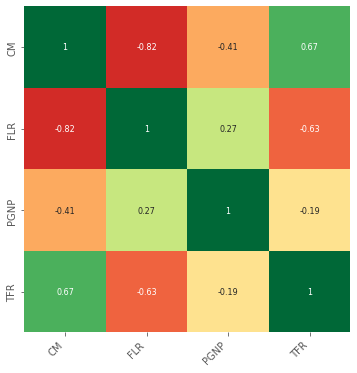

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(
    df.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "RdYlGn",
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

 Hay una alta correlación entre CM y FLR, pero no pasa nada, la importancia de esto, es que no debe haber una alta correlacion
 entre las variables explicativas.

 Para este caso en especifico, ninguna de las variables independientes presenta una alta correlacion, por lo que
 no se presenta una correlacion muy fuerte, no se presente multicolinealidad perfecta y es posible estimar los parametros

### Calculo de multicolinealidad mediante VIF

$  VIF = \frac{\sigma^{2}\cdot (n-1)\cdot Stda Error^2}{PP Residuos}	 $ 
- N : Numero de observaciones.
- $\sigma^{2} $ : Varianza de la variable.
- $ Stda Error^2 $ : Error Estandar del Coef. de la variable dependiente.
- $ PP Residuos $ : Varianza de los Residuos. 

 El Factor de Inflación de Varianza (VIF), nos dice que : 
   “VIFs altos reflejan un incremento en las varianzas de los coeficientes de regresión
   estimados debido a colinealidad entre variables predictoras, en comparación con las que se obtendrían cuando
    las predictoras son ortogonales”

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
exog = sm.add_constant(df[df.columns[1:4]])
rango = sm.add_constant(df[df.columns[1:4]]).shape[1]
for i in range(rango):
    vif.append(variance_inflation_factor(exog.values, i))
pd.DataFrame({'VIF': vif[1:]}, index= df.columns[1:4])
# vif 10 mucho

,VIF
FLR,1.711845
PGNP,1.078306
TFR,1.645150


Ninguna de las variables presenta un VIF elevado, por lo que no se sugier que alguna de stas variables de muy colineal.

## Supuesto de No sesgo de especificación.

La forma funcional que adopta el modelo debe ser la correcta, y las variables incluidas son adecuadas.

Se puede examinar Visualmente si la forma funcional adoptada es la adecuada mediante graficos, tales como un diagrama
de dispersión con los valores estimados contra los residuos, esperandose un comportamiento relativamente estable, con los puntos, distribuidos simetricamente alrededor del 0.

In [9]:
# Se construirá un modelo y se estimará.
Y = df["CM"]
X = df[["PGNP", "FLR"]]
Modelo = sm.OLS(Y, sm.add_constant(X))
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           5.12e-17
Time:                        17:44:27   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

In [10]:
# Se obtendrán los residuos
Residuos = Resultados.resid

# Asignar valores estimados que se obtienen con la aplicacion del modelo con .predict()

Valores_estimados = Resultados.predict()

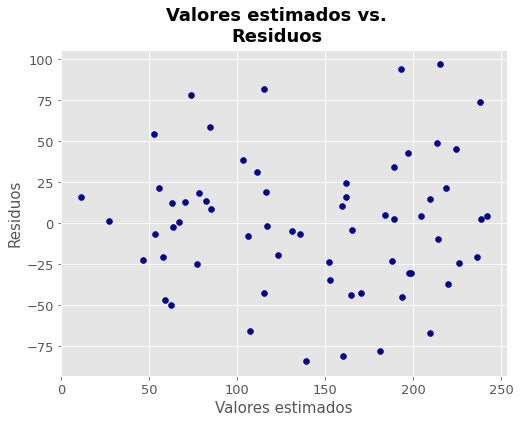

In [11]:
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Valores estimados vs.\nResiduos",
fontsize = 18,
fontweight = "bold")
ax.scatter(Valores_estimados, Residuos,
color = "darkblue")
ax.set_xlabel("Valores estimados", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 13)

plt.show()

No se presenta un patrón especifico y los puntos están simetriamente disitrbuidos alreador del 0, se sugiere que la forma
funcional adoptada no es erronea.


La estructura del modelo, se debe mantener a lo largo de la estimación (Que no sea inestable). Para verificar esto se realizará
la pruebna CUSUM basada en los residuos.

Se tomará como Hipotesis nula el no cambio estructural.

In [12]:
ResultadosTest = sms.breaks_cusumolsresid(Residuos)
print(ResultadosTest)

(0.5191974341185248, 0.950322770591811, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [13]:
Nombres = ["Estadístico", "p-value del estadístico", "Valores críticos"]
pd.Series(ResultadosTest, index = Nombres)


Estadístico                                          0.519197
p-value del estadístico                              0.950323
Valores críticos           [(1, 1.63), (5, 1.36), (10, 1.22)]
dtype: object

Con un nivel de significacia al 5%, no se rechaza la hipotesis nula, y se concluyeque no se presenta un cambio estructural.

## Valor medio de la perturbación igual a 0.

Los residuos pueden tener tantos valores positivos omo negativos, pero la distribución de estos debe ser reletivamente 
simetrica.
Para verificar este supuesto basta con obtener la media

In [14]:
np.mean(Residuos)

-7.105427357601002e-15

Es practicamente 0, por lo que este supuesto se cumple para el ejemplo.

## Homoscedasticidad

Se debe exhibir varianza constante.

La homocedasticidad es una propiedad deseable de los errores de un modelo de regresión simple. La homocedasticidad, como hemos dicho anteriormente, nos permite realizar modelos más fiables. Y esa fiabilidad se ve reflejada en que sea mucho más fácil para los económetras trabajar con el modelo.

Una de las pruebas estadísticas generalmente empleadas para verificar la presencia de heteroscedasticidad
es el Test Breusch-Pagan de Multiplicadores de Lagrange (Greene, 2003), el cual, básicamente, toma como
hipótesis nula homoscedasticidad.


In [15]:
Explicativas = Resultados.model.exog

In [16]:
ResultadosTest = sms.het_breuschpagan(Residuos, Explicativas)
Nombres = ["Estadístico LM", "p-value del estadístico LM", "Estadístico F",
"p-value del estadístico F"]
pd.Series(ResultadosTest, index = Nombres)

Estadístico LM                1.591582
p-value del estadístico LM    0.451224
Estadístico F                 0.777832
p-value del estadístico F     0.463904
dtype: float64

Asumiendo un nivel de significancia de 5 %, como p − value > α entonces no se rechaza la hipótesis nula
y se concluye que se presenta homoscedasticidad en el término de error

Otra de las pruebas estadísticas comúnmente empleadas para verificar la presencia de heteroscedasticidad
es el TestWhite de Multiplicadores de Lagrange, el cual hace uso de regresiones auxiliares, toma, esencialmente,
como hipótesis nula homoscedasticidad.

In [17]:
ResultadosTest = sms.het_white(Residuos, Explicativas)
Nombres = ["Estadístico LM", "p-value del estadístico LM",
"Estadístico F", "p-value del estadístico F"]
pd.Series(ResultadosTest, index = Nombres)


Estadístico LM                2.356718
p-value del estadístico LM    0.797902
Estadístico F                 0.443486
p-value del estadístico F     0.816252
dtype: float64

Asumiendo un nivel de significancia de 5 %, como
p − value > α entonces no se rechaza la hipótesis nula y se concluye que se presenta homoscedasticidad en
el término de error

## No Autocorrelacion, o correlación serial entre las perturbaciones.

El supuesto de no autocorrelación entre las perturbaciones indica que estas no siguen patrones sistemáticos
y no están correlacionadas entre sí; tal supuesto puede justificarse para el caso de datos transversales, pero
tiende a incumplirse cuando se trabaja con series de tiempo, en cuanto las observaciones sucesivas usualmente
están fuertemente correlacionada.

### Test de durbin-watson

Se vereficará mediante el test de Dubin-Watson, el cual toma como hipotesis nula no autocorrelación.

In [18]:
ResultadosTest = sms.durbin_watson(Residuos)
Nombres = ["Estadístico DW"]
pd.Series(ResultadosTest, index = Nombres)

Estadístico DW    2.186159
dtype: float64

A diferencia del resto, esto no se reporta con un p-value

El estadístico Durbin-Watson es contrastado con valores críticos a partir de los cuales se establecen zonas
de autocorrelación positiva, no autocorrelación, indeterminación y autocorrelación negativa; dependiendo de
la zona en la que se ubique el valor del estadístico, se obtiene una conclusión específica.



![Durbin](Durbin.png)

[De aqui se sacan las tablas](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/)

In [19]:
dl =  1.536
du = 1.662
d = 2.1861

In [20]:
0 < d < dl

False

In [21]:
dl < d < du

False

In [22]:
(4 - dl) < d < 4

False

In [23]:
(4 - du) < d < (4-dl)

False

In [24]:
du < d < (4-du)

True

A través del test anterior , no rechazamos la hipotesis, y no hay autocrrelacion positiva o negativa.

### Test Breusch-Godfrey

 Test Breusch-Godfrey, el cual toma, esencialmente, no autocorrelación como hipótesis
nula y se basa en la ejecución de una regresión auxiliar en la que se incluyen rezagos del término de error como
variables explicativas 

In [25]:
ResultadosTest = sms.acorr_breusch_godfrey(Resultados, nlags = 1)
Nombres = ["Estadístico LM", "p-value del estadístico LM", "Estadístico F",
"p-value del estadístico F"]
pd.Series(ResultadosTest, index = Nombres)


Estadístico LM                0.728605
p-value del estadístico LM    0.393336
Estadístico F                 0.690933
p-value del estadístico F     0.409143
dtype: float64

no se rechaza la hipótesis nula y se concluye que no se presenta
correlación serial de primer orden en el término de error

In [26]:
ResultadosTest = sms.acorr_breusch_godfrey(Resultados, nlags = 4)
Nombres = ["Estadístico LM", "p-value del estadístico LM", "Estadístico F",
"p-value del estadístico F"]
pd.Series(ResultadosTest, index = Nombres)


Estadístico LM                1.211387
p-value del estadístico LM    0.876220
Estadístico F                 0.274927
p-value del estadístico F     0.892978
dtype: float64

Se concluye que no hay correlación serial hasta de orden
4 

## Supuesto de normalidad

El supuesto de normalidad en los errores hacen referencia que la distribuciones de los errores deberían
ser normales, y su existencia viene justificada por la necesidad de llevar a cabo inferencia estadisitca.

### Test Jarque-Bera

Una de las pruebas estadísticas más populares empleadas para verificar el cumplimiento de normalidad en
la distribución del término de error es el Test Jarque-Bera, el cual se basa en la asimetría y la curtosis.  Toma como hipótesis nula, básicamente, distribución normal.

In [27]:

ResultadosTest = sms.jarque_bera(Residuos)
Nombres = ["Jarque-Bera", "p-value", "Asimetría", "Curtosis"]
pd.Series(ResultadosTest, index = Nombres)


Jarque-Bera    0.559405
p-value        0.756009
Asimetría      0.227575
Curtosis       2.948855
dtype: float64

No se rechaza la hipótesis nula
y se concluye que se presenta normalidad en la distribución del término de error

Otra forma es mediante el grafico cuantil-cuantil.
### Grafico cuantil-cuantil

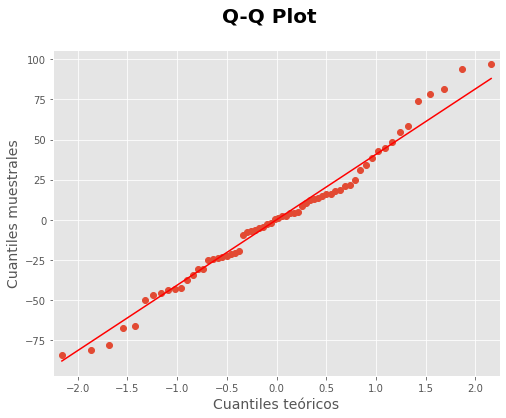

In [28]:
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Q-Q Plot", size = 20,
fontweight = "bold")
sm.qqplot(Residuos, ax = ax, line = "s",

color = "darkblue")
ax.set_xlabel("Cuantiles teóricos", fontsize = 14)
ax.set_ylabel("Cuantiles muestrales", fontsize = 14)

plt.show()


Como se observa, la mayoría de puntos se sitúa muy cerca de la línea roja de referencia, indicador de que
la distribución de los datos no dista mucho de la teórica (la normal).

Parte de este script fue basado en "Econometría básica con Python" , escrito por Fabián Alejandro Triana Alarcón